# Methodology according to Belgium (Flanders)

# Methodology according to Belgium (Flanders)

They select two time series a short and a long one. The short spans for 3 years while the long spans for 10 years.
The Linear regression is calculated per station.
The aquifer is given a good or bad status depending upon the the percentage of rising or falling individual wells.

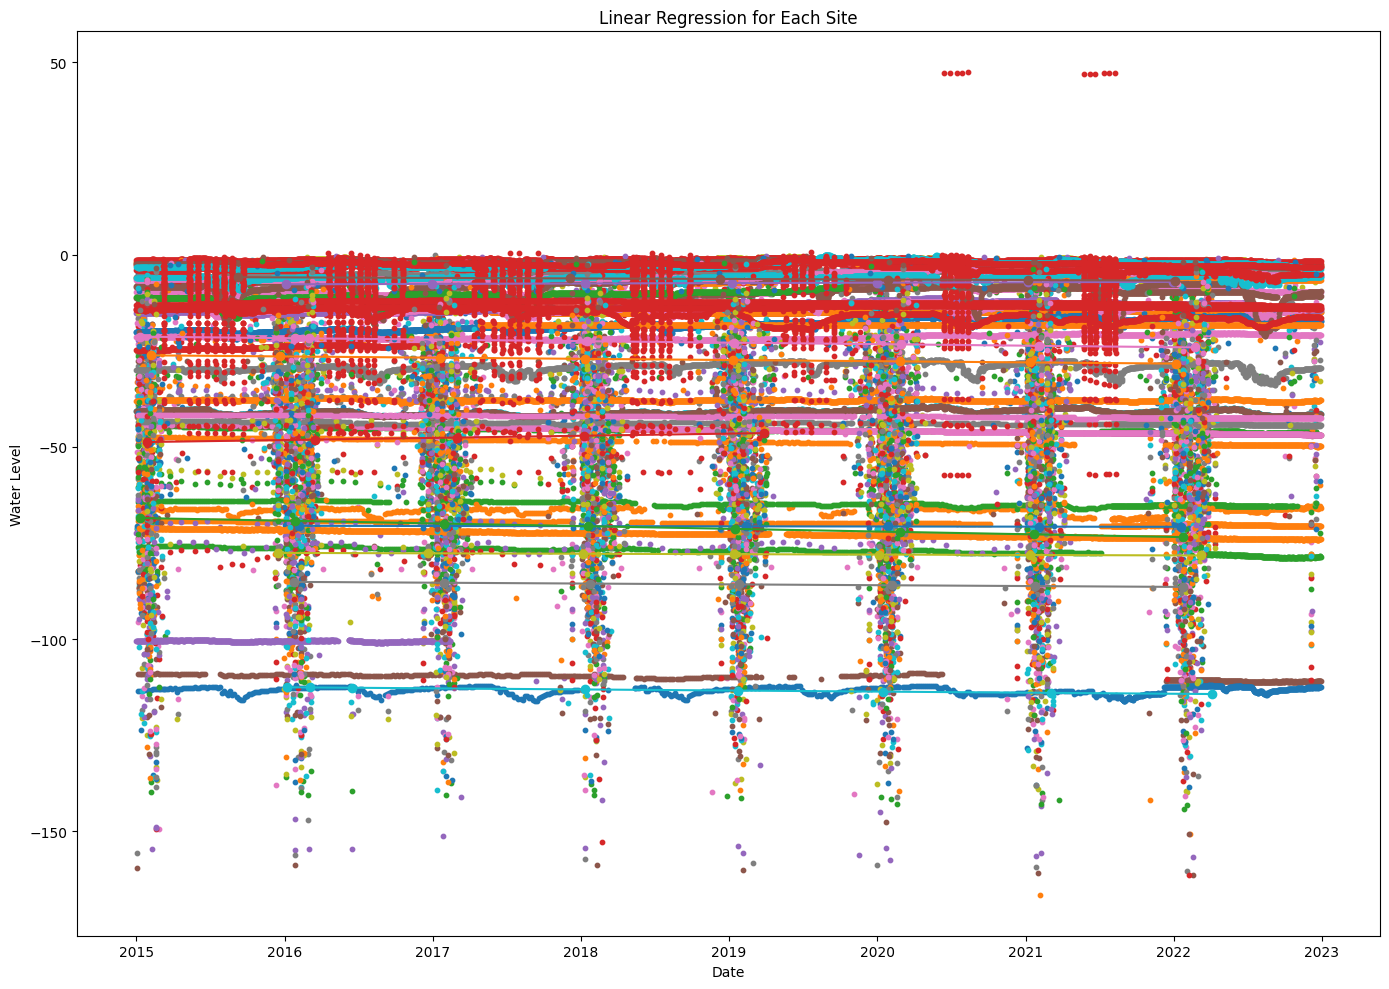

In [5]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('Data Subset.csv', sep=',')

# Step 2: Data Preprocessing
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')  # Corrected date format

# Step 2a: Select the date range for analysis
start_date = '2015-01-01'
end_date = '2022-12-31'
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Step 3: Check and convert the 'level' column to a numeric data type
df['level'] = pd.to_numeric(df['level'], errors='coerce')

# Step 4: Create a list to store the regression models
regression_models = []

# Step 5: Conduct Linear Regression for each site
sites = df['site'].unique()

for site in sites:
    site_data = df[df['site'] == site]
    X = sm.add_constant(site_data['date'].map(pd.Timestamp.toordinal))
    y = site_data['level']
    model = sm.OLS(y, X).fit()
    regression_models.append(model)

# Step 6: Plot all regression lines on one graph
plt.figure(figsize=(14, 10))  # Increased figure size

# Scatter plot of data points for each site
for site in sites:
    site_data = df[df['site'] == site]
    plt.scatter(site_data['date'], site_data['level'], label=site, s=10)

# Plot regression lines for a random subset of sites with 'o' marker style for disconnected lines
import random
random.seed(42)  # Set a seed for reproducibility
num_sites_to_plot = min(len(sites), 10)  # Limit to a maximum of 10 sites to plot
sites_to_plot = random.sample(sites.tolist(), num_sites_to_plot)
for site in sites_to_plot:
    site_data = df[df['site'] == site]
    model_idx = sites.tolist().index(site)
    model = regression_models[model_idx]
    plt.plot(site_data['date'], model.fittedvalues, marker='o', linestyle='-', label=f'{site} Regression Line')

plt.xlabel('Date')
plt.ylabel('Water Level')
plt.title('Linear Regression for Each Site')
# plt.legend(loc='upper right')  # Set the legend location
plt.tight_layout()
plt.show()

Percentage of sites with relevant trends: 52.89%
Percentage of sites with rising trends: 8.09%
Percentage of sites with falling trends: 44.79%
Percentage of sites with irrelevant trends: 47.11%


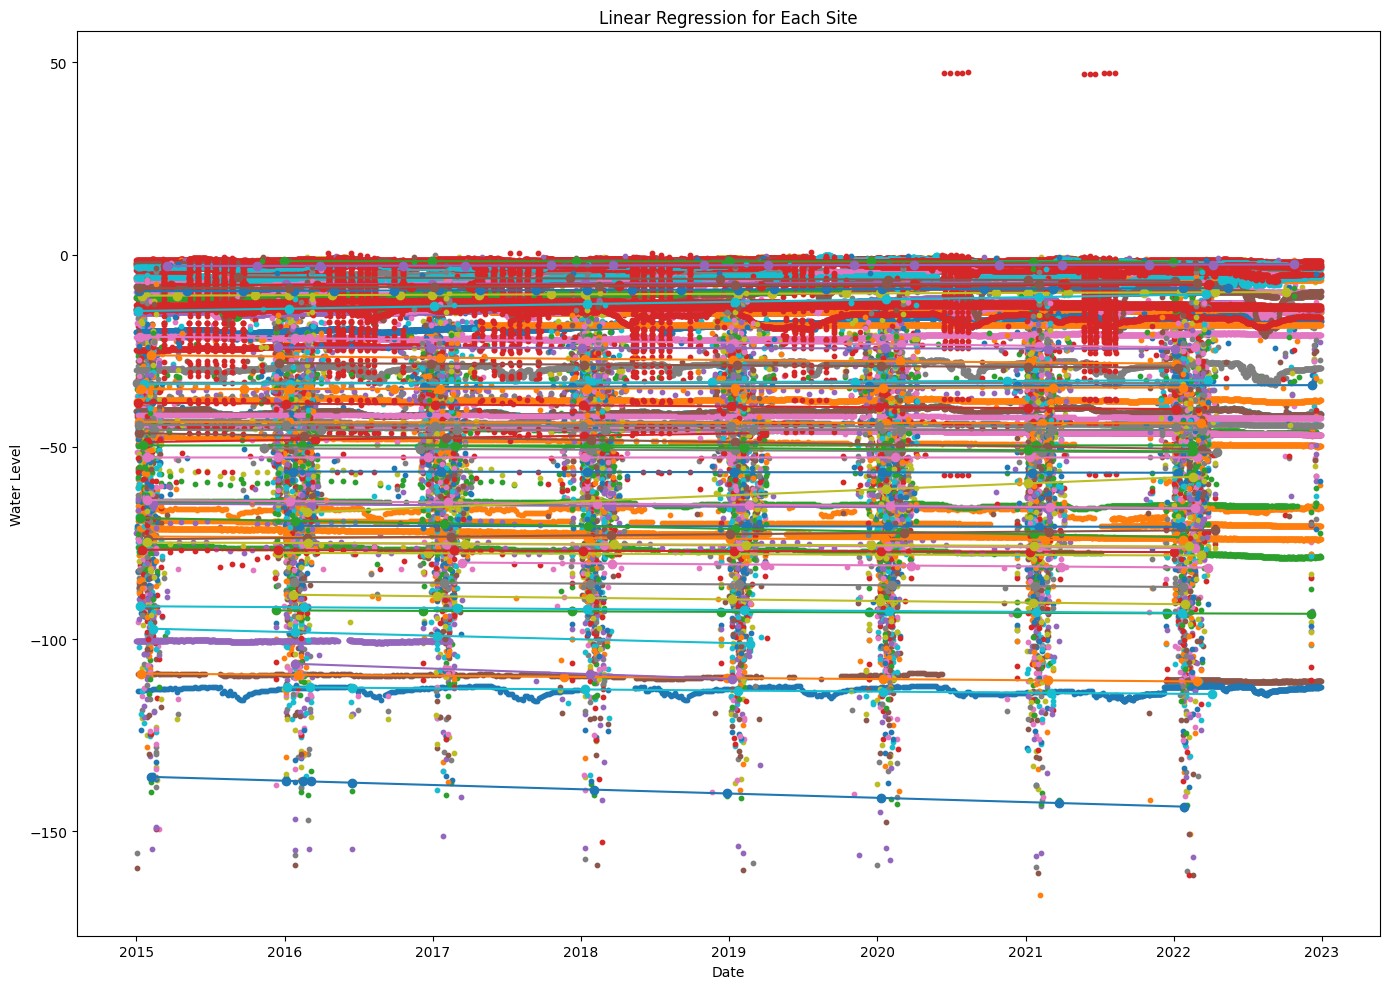

In [7]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('Data Subset.csv', sep=',')

# Step 2: Data Preprocessing
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')  # Corrected date format

# Step 2a: Select the date range for analysis
start_date = '2015-01-01'
end_date = '2022-12-31'
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Step 3: Check and convert the 'level' column to a numeric data type
df['level'] = pd.to_numeric(df['level'], errors='coerce')

# Step 4: Create a list to store the regression models
regression_models = []

# Step 5: Conduct Linear Regression for each site
sites = df['site'].unique()

for site in sites:
    site_data = df[df['site'] == site]
    X = sm.add_constant(site_data['date'].map(pd.Timestamp.toordinal))
    y = site_data['level']
    model = sm.OLS(y, X).fit()
    regression_models.append(model)

# Step 6: Calculate the statistics for trend relevance and direction
relevant_trends = 0
rising_trends = 0
falling_trends = 0
irrelevant_trends = 0

for model in regression_models:
    if len(model.pvalues) > 1:
        p_value = model.pvalues[1]  # P-value of the coefficient for the 'date' variable
        if p_value < 0.05:
            relevant_trends += 1
            if model.params[1] > 0:
                rising_trends += 1
            else:
                falling_trends += 1
        else:
            irrelevant_trends += 1
    else:
        irrelevant_trends += 1


# Step 7: Display the percentages
total_sites = len(regression_models)
percentage_relevant = (relevant_trends / total_sites) * 100
percentage_rising = (rising_trends / total_sites) * 100
percentage_falling = (falling_trends / total_sites) * 100
percentage_irrelevant = (irrelevant_trends / total_sites) * 100

print(f"Percentage of sites with relevant trends: {percentage_relevant:.2f}%")
print(f"Percentage of sites with rising trends: {percentage_rising:.2f}%")
print(f"Percentage of sites with falling trends: {percentage_falling:.2f}%")
print(f"Percentage of sites with irrelevant trends: {percentage_irrelevant:.2f}%")

# Step 8: Plot all regression lines on one graph
plt.figure(figsize=(14, 10))  # Increased figure size

# Scatter plot of data points for each site
for site in sites:
    site_data = df[df['site'] == site]
    plt.scatter(site_data['date'], site_data['level'], label=site, s=10)

# Plot regression lines for a random subset of sites with 'o' marker style for disconnected lines
import random
random.seed(42)  # Set a seed for reproducibility
num_sites_to_plot = min(len(sites), 10)  # Limit to a maximum of 10 sites to plot
sites_to_plot = random.sample(sites.tolist(), num_sites_to_plot)
for site in sites_to_plot:
    site_data = df[df['site'] == site]
    model_idx = sites.tolist().index(site)
    model = regression_models[model_idx]
    plt.plot(site_data['date'], model.fittedvalues, marker='o', linestyle='-', label=f'{site} Regression Line')

plt.xlabel('Date')
plt.ylabel('Water Level')
plt.title('Linear Regression for Each Site')
# plt.legend(loc='upper right')  # Set the legend location
plt.tight_layout()
plt.show()


Percentage of sites with relevant trends: 48.89%
Percentage of rising trends among relevant trends: 20.37%
Percentage of falling trends among relevant trends: 79.63%


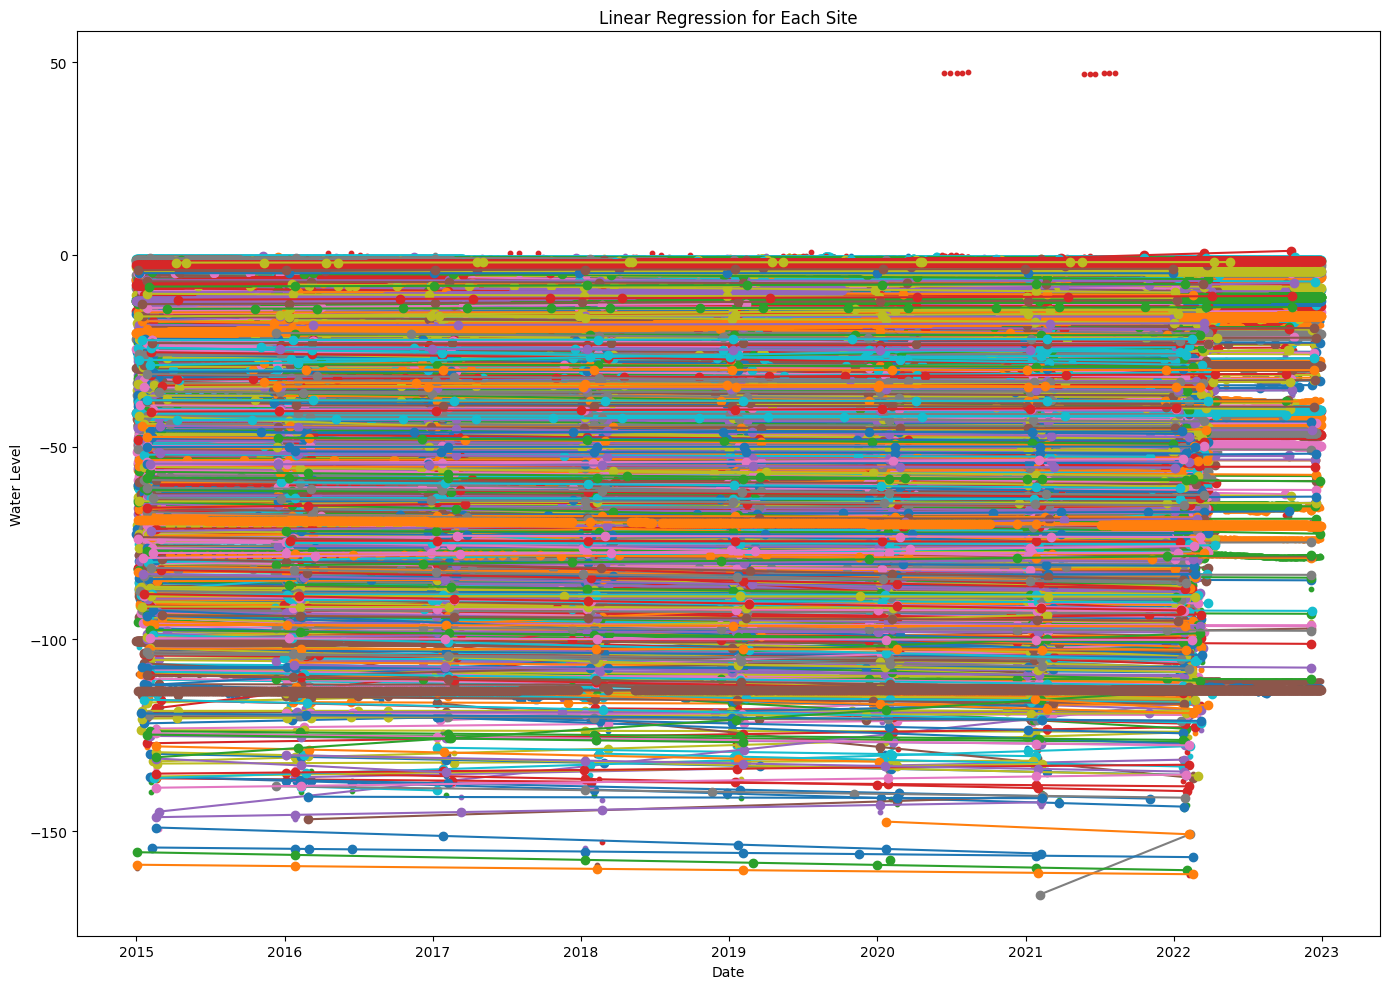

In [24]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import random

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('Data Subset.csv', sep=',')

# Step 2: Data Preprocessing
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')  # Corrected date format

# Step 2a: Select the date range for analysis
start_date = '2015-01-01'
end_date = '2022-12-31'
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Step 3: Check and convert the 'level' column to a numeric data type
df['level'] = pd.to_numeric(df['level'], errors='coerce')

# Step 4: Create a list to store the regression models
regression_models = []

# Step 5: Conduct Linear Regression for each site
sites = df['site'].unique()

for site in sites:
    site_data = df[df['site'] == site]
    X = sm.add_constant(site_data['date'].map(pd.Timestamp.toordinal))
    y = site_data['level']
    model = sm.OLS(y, X).fit()
    regression_models.append(model)

# Step 6: Calculate statistics for relevant trends
relevant_trends = 0
rising_trends = 0
falling_trends = 0
relevant_sites_data = []

for site, model in zip(sites, regression_models):
    if model.pvalues[0] < 0.05:  # Check if the trend is statistically significant
        relevant_trends += 1
        slope = model.params['date']
        relevant_sites_data.append({'site': site, 'slope': slope})
        if slope > 0:
            rising_trends += 1
        else:
            falling_trends += 1

# Calculate percentages
total_sites = len(sites)
percentage_relevant_trends = (relevant_trends / total_sites) * 100
percentage_rising_trends = (rising_trends / relevant_trends) * 100
percentage_falling_trends = (falling_trends / relevant_trends) * 100

# Display percentages
print(f"Percentage of sites with relevant trends: {percentage_relevant_trends:.2f}%")
print(f"Percentage of rising trends among relevant trends: {percentage_rising_trends:.2f}%")
print(f"Percentage of falling trends among relevant trends: {percentage_falling_trends:.2f}%")

# Save relevant sites data to a new CSV file
relevant_sites_df = pd.DataFrame(relevant_sites_data)
relevant_sites_df.to_csv('Output_Flanders.csv', index=False)

# Step 7: Plot all regression lines on one graph
plt.figure(figsize=(14, 10))  # Increased figure size

# Scatter plot of data points for each site
for site in sites:
    site_data = df[df['site'] == site]
    plt.scatter(site_data['date'], site_data['level'], label=site, s=10)

# Plot regression lines for a random subset of sites with 'o' marker style for disconnected lines
random.seed(42)  # Set a seed for reproducibility
num_sites_to_plot = min(len(sites), 2000)  # Limit to a maximum of 10 sites to plot
sites_to_plot = random.sample(sites.tolist(), num_sites_to_plot)
for site in sites_to_plot:
    site_data = df[df['site'] == site]
    model_idx = sites.tolist().index(site)
    model = regression_models[model_idx]
    plt.plot(site_data['date'], model.fittedvalues, marker='o', linestyle='-', label=f'{site} Regression Line')

plt.xlabel('Date')
plt.ylabel('Water Level')
plt.title('Linear Regression for Each Site')
# plt.legend(loc='upper right')  # Set the legend location
plt.tight_layout()
plt.show()


# Actual Methdodology

In [11]:
import pandas as pd

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('Data Subset.csv')

# Step 2: Data Preprocessing
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Step 3: Calculate short-term trends (3 years)
df['short_term_trend'] = df.groupby('site')['level'].diff(periods=3)

# Step 4: Calculate long-term trends (10 years)
df['long_term_trend'] = df.groupby('site')['level'].diff(periods=10)

# Step 5: Determine the short-term trend status
df['short_term_status'] = df['short_term_trend'].apply(lambda x: 'rising' if x > 0.3 else 'falling' if x < -0.3 else 'stable')

# Step 6: Determine the long-term trend status
df['long_term_status'] = df['long_term_trend'].apply(lambda x: 'rising' if x > 0.5 else 'falling' if x < -0.5 else 'stable')

# Step 7: Calculate the percentage of rising, stable, and falling groundwater levels for each site
site_results = []
sites = df['site'].unique()
for site in sites:
    site_data = df[df['site'] == site]
    total_count = len(site_data)
    rising_percentage = (site_data['short_term_status'] == 'rising').sum() / total_count * 100
    stable_percentage = (site_data['short_term_status'] == 'stable').sum() / total_count * 100
    falling_percentage = (site_data['short_term_status'] == 'falling').sum() / total_count * 100
    site_results.append({'site': site, 'rising_percentage': rising_percentage, 'stable_percentage': stable_percentage, 'falling_percentage': falling_percentage})

# Step 8: Save the results to a new CSV file
site_results_df = pd.DataFrame(site_results)
site_results_df.to_csv('site_trend_results.csv', index=False)


In [12]:
import pandas as pd

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('Data Subset.csv')

# Step 2: Data Preprocessing
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Step 3: Calculate short-term trends (3 years)
df['short_term_trend'] = df.groupby('site')['level'].diff(periods=3)

# Step 4: Calculate long-term trends (10 years)
df['long_term_trend'] = df.groupby('site')['level'].diff(periods=10)

# Step 5: Determine the short-term trend status
df['short_term_status'] = df['short_term_trend'].apply(lambda x: 'rising' if x > 0.3 else 'falling' if x < -0.3 else 'stable')

# Step 6: Determine the long-term trend status
df['long_term_status'] = df['long_term_trend'].apply(lambda x: 'rising' if x > 0.5 else 'falling' if x < -0.5 else 'stable')

# Step 7: Calculate the percentage of rising, stable, and falling groundwater levels
total_count = len(df)
rising_percentage = (df['short_term_status'] == 'rising').sum() / total_count * 100
stable_percentage = (df['short_term_status'] == 'stable').sum() / total_count * 100
falling_percentage = (df['short_term_status'] == 'falling').sum() / total_count * 100

# Step 8: Calculate the percentage of rising and falling long-term trends
long_term_rising_percentage = (df['long_term_status'] == 'rising').sum() / total_count * 100
long_term_falling_percentage = (df['long_term_status'] == 'falling').sum() / total_count * 100

# Step 9: Display the results
print("Short-Term Trend Analysis:")
print(f"Percentage of rising trends: {rising_percentage:.2f}%")
print(f"Percentage of stable trends: {stable_percentage:.2f}%")
print(f"Percentage of falling trends: {falling_percentage:.2f}%")
print("\nLong-Term Trend Analysis:")
print(f"Percentage of rising long-term trends: {long_term_rising_percentage:.2f}%")
print(f"Percentage of falling long-term trends: {long_term_falling_percentage:.2f}%")


Short-Term Trend Analysis:
Percentage of rising trends: 5.39%
Percentage of stable trends: 83.81%
Percentage of falling trends: 10.80%

Long-Term Trend Analysis:
Percentage of rising long-term trends: 4.21%
Percentage of falling long-term trends: 9.89%


In [16]:
import pandas as pd

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('Data Subset.csv')

# Step 2: Data Preprocessing
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Step 3: Calculate short-term trends (3 years)
df['short_term_trend'] = df.groupby('site')['level'].diff(periods=3)

# Step 4: Calculate long-term trends (10 years)
df['long_term_trend'] = df.groupby('site')['level'].diff(periods=10)

# Step 5: Determine the short-term trend status
df['short_term_status'] = df['short_term_trend'].apply(lambda x: 'rising' if x > 0.3 else 'falling' if x < -0.3 else 'stable')

# Step 6: Determine the long-term trend status
df['long_term_status'] = df['long_term_trend'].apply(lambda x: 'rising' if x > 0.5 else 'falling' if x < -0.5 else 'stable')

# Step 7: Calculate the percentage of rising, stable, and falling groundwater levels for short-term trends
total_count = len(df)
rising_percentage = (df['short_term_status'] == 'rising').sum() / total_count * 100
stable_percentage = (df['short_term_status'] == 'stable').sum() / total_count * 100
falling_percentage = (df['short_term_status'] == 'falling').sum() / total_count * 100

# Step 8: Calculate the percentage of rising and falling long-term trends
long_term_rising_percentage = (df['long_term_status'] == 'rising').sum() / total_count * 100
long_term_falling_percentage = (df['long_term_status'] == 'falling').sum() / total_count * 100

# Step 9: Calculate the percentage of long-term stable trends
long_term_stable_percentage = (df['long_term_status'] == 'stable').sum() / total_count * 100

# Step 10: Display the results
print("Short-Term Trend Analysis:")
print(f"Percentage of rising trends: {rising_percentage:.2f}%")
print(f"Percentage of stable trends: {stable_percentage:.2f}%")
print(f"Percentage of falling trends: {falling_percentage:.2f}%")
print("\nLong-Term Trend Analysis:")
print(f"Percentage of rising long-term trends: {long_term_rising_percentage:.2f}%")
print(f"Percentage of stable long-term trends: {long_term_stable_percentage:.2f}%")
print(f"Percentage of falling long-term trends: {long_term_falling_percentage:.2f}%")


Short-Term Trend Analysis:
Percentage of rising trends: 5.39%
Percentage of stable trends: 83.81%
Percentage of falling trends: 10.80%

Long-Term Trend Analysis:
Percentage of rising long-term trends: 4.21%
Percentage of stable long-term trends: 85.90%
Percentage of falling long-term trends: 9.89%


# Monthly

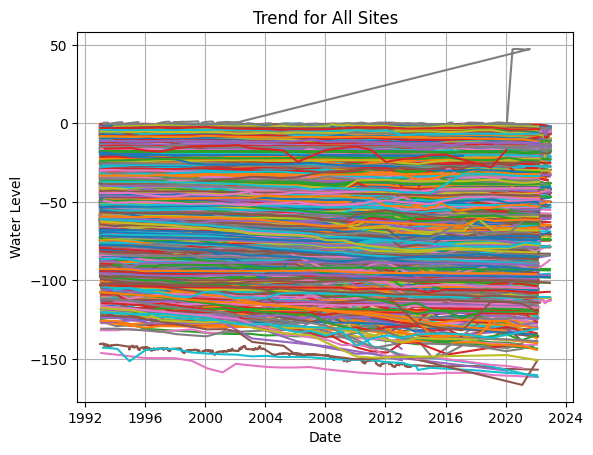

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
data = pd.read_csv("Data Subset.csv")

# Parse date column as datetime
data['date'] = pd.to_datetime(data['date'])

# Group data by monitoring stations
grouped_data = data.groupby('site')

# Function to compute trend status
def compute_trend_status(group):
    # Remove positive values from the 'level' column
    filtered_level = group['level'][group['level'] < 0]

    short_term_threshold = 0.1  # 0.1 m/y
    long_term_threshold = 0.05  # 0.05 m/y

    # Short-term trend
    short_term_trend = (
        (filtered_level.iloc[-1] - filtered_level.iloc[0]) / 3
    )  # Compute average annual change
    short_term_status = "Rising" if short_term_trend >= short_term_threshold else "Falling" if short_term_trend <= -short_term_threshold else "Stable"

    # Long-term trend
    long_term_trend = (
        (filtered_level.iloc[-1] - filtered_level.iloc[0]) / 10
    )  # Compute average annual change
    long_term_status = "Rising" if long_term_trend >= long_term_threshold else "Falling" if long_term_trend <= -long_term_threshold else "Stable"

    return pd.Series({'Short-Term Status': short_term_status, 'Long-Term Status': long_term_status})

# Apply the function to each station group
trend_status_df = grouped_data.apply(compute_trend_status)

# Calculate the percentage of rising, stable, and falling levels for each station
status_percentage = trend_status_df.apply(lambda x: x.value_counts(normalize=True) * 100)

# Plot the graph for all sites on one plot
plt.figure()

for site, group in grouped_data:
    plt.plot(group['date'], group['level'], label=f'Site: {site}')

plt.xlabel('Date')
plt.ylabel('Water Level')
plt.title('Trend for All Sites')
#plt.legend()
plt.grid(True)
plt.show()
